# Урок 1 
Загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [2]:
#Ваш код здесь
vc = df['gender'].value_counts()
vc / vc.sum()

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

##### 2. Какое количество уникальных значений у поля InternetService?

In [3]:
#Ваш код здесь
len(df['InternetService'].unique())

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

1394.55
2279.7343035638223
2266.7944696890213


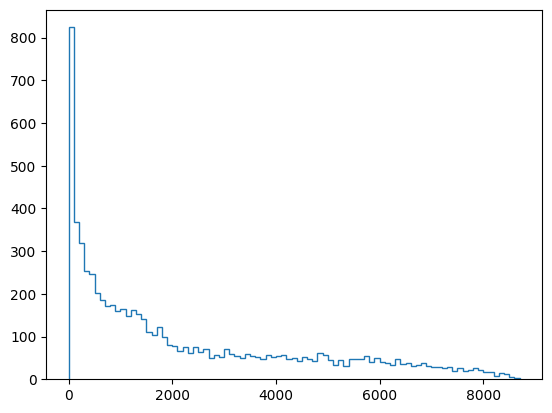

In [4]:
#Ваш код здесь
tc = df['TotalCharges'].apply(lambda x: x.replace(' ', ''))\
                       .apply(lambda x: x if x else 0)\
                       .astype('float')
print(tc.median())
print(tc.mean())
print(tc.std())

bin_size = 100
counts, bins = np.histogram(tc, bins=range(int(tc.min()), int(tc.max()) + bin_size, bin_size))
plt.stairs(counts, bins)

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [5]:
#Ваш код здесь
ps = df['PhoneService'].apply(lambda x: x.replace('Yes', '1')\
                                         .replace('No', '0'))\
                       .astype('int')
ps

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [6]:
#Ваш код здесь
# См. выше

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [7]:
#Ваш код здесь
df['Churn'] = df['Churn'].apply(lambda x: x.replace('Yes', '1').replace('No', '0')).astype('int')

df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [8]:
#Ваш код здесь
df[['StreamingMovies', 'StreamingTV', 'TechSupport']] =\
df[['StreamingMovies', 'StreamingTV', 'TechSupport']].apply(lambda x: x.replace('Yes', '1')\
                                                                                .replace('No', '0')\
                                                                                .replace('No internet service', '0'))\
                                                              .astype('int')

df[['StreamingMovies', 'StreamingTV', 'TechSupport']]

,StreamingMovies,StreamingTV,TechSupport
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
7038,1,1,1
7039,1,1,0
7040,0,0,0
7041,0,0,0


##### 8. Заполните пропуски в поле PhoneService значением 0

In [9]:
#Ваш код здесь
# См выше

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [10]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь
df[columns].head(3)

# Пока не будем делать изменений с исходным датасетом, чтобы в будущем 
# добавить эти изменения в пайплайн. Это нужно, чтобы не страдать при 
# сборке программы для итоговых предсказаний, дабы все трансформации с 
# данными были внутри пайплайна.

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,No,29.85,0,0,0,0
1,Male,34,Yes,1889.5,0,0,0,0
2,Male,2,Yes,108.15,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

# Дополним своим трансформером, в котором будут все преобразования, которые делали над датасетом ранее
class PrepareAllTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):  
        X_ = X.copy()
        X_['TotalCharges'] = X_['TotalCharges'].apply(lambda x: x.replace(' ', ''))\
                       .apply(lambda x: x if x else 0)\
                       .astype('float')
        
        X_[['PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport']] =\
        X_[['PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport']].apply(lambda x: x.replace('Yes', '1')\
                                                                                        .replace('No', '0')\
                                                                                        .replace('No internet service', '0'))\
                                                                                      .astype('int')
        return X_
    
gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [13]:
#Ваш код здесь
gender.fit_transform(X_train)

,gender_Female,gender_Male
298,0,1
3318,0,1
5586,1,0
6654,1,0
5362,0,1
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [14]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [15]:
#Ваш код здесь
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [16]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies',
                                                 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [17]:
prepare_all =  Pipeline([
                ('prepare_all', PrepareAllTransformer())
            ])

In [18]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('prepare_all', prepare_all), ('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [19]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Придётся сделать небольщие преобразования для целевой колонки. Потому что в пайплайн это не засунешь.
# Единственный плюс - это надо только для создания модели, а не её использования
df['Churn'] = df['Churn'].apply(lambda x: x.replace('Yes', '1').replace('No', '0')).astype('int')

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feature_processing),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 Pipeline(steps=[('prepare_all',
                                  Pipeline(steps=[('prepare_all',
                                                   PrepareAllTransformer())])),
                                 ('feats',
                                  FeatureUnion(transformer_list=[('tenure',
                                                                  Pipeline(steps=[('selector',
                                                                                   NumberSelector(key='tenure')),
                                                                                  ('standard',
                                                                                   StandardScaler())])),
                                                                 ('TotalCharges',
                                                                  Pipeline(steps=[('selector',
                                                                                   NumberSelector(key='TotalCharges')),
                                                                                  ('standard',
                                                                                   StandardScaler())])),
                                                                 ('continuos_features',
                                                                  Pipeline(steps=[('selector',
                                                                                   ColumnSelector(key=['PhoneService',
                                                                                                       'StreamingMovies',
                                                                                                       'StreamingTV',
                                                                                                       'TechSupport']))])),
                                                                 ('gender',
                                                                  Pipeline(steps=[('selector',
                                                                                   ColumnSelector(key='gender')),
                                                                                  ('ohe',
                                                                                   OHEEncoder(key='gender'))]))]))])),
                ('classifier', RandomForestClassifier(random_state=42))])

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [21]:
#Ваш код здесь
y_pred = pipeline.predict(X_test)
set(y_pred) # возвращает только два класса - 0 и 1

{0, 1}

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [22]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
print("roc auc score: {}".format(roc_auc_score(y_true=y_test, y_score=pipeline.predict_proba(X_test)[:,1])))
print("log loss score: {}".format(log_loss(y_true=y_test, y_pred=pipeline.predict_proba(X_test)[:,1])))

roc auc score: 0.7841629477271619
log loss score: 0.8278446325489678


### Сохраним наш пайплайн

In [23]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)